In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
filepath = 'tvmarketing.csv'
data = pd.read_csv(filepath)

In [10]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


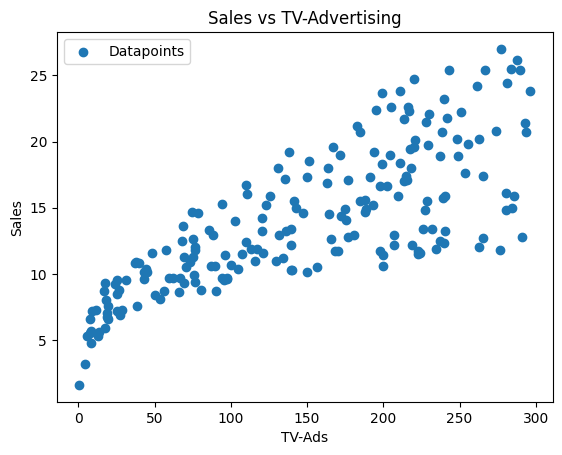

In [11]:
plt.scatter(data['TV'],data['Sales'], label='Datapoints')
plt.xlabel('TV-Ads')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales vs TV-Advertising')
plt.show()

<Axes: >

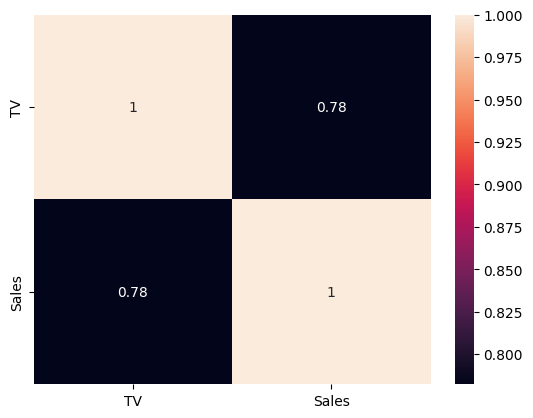

In [12]:
import seaborn as sns

correlation = data.corr()

sns.heatmap(correlation, annot=True)

In [13]:
from sklearn.model_selection import train_test_split

feature = ['TV']
target = ['Sales']
X = data[feature]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_preds = model.predict(X_test)
MAE = mean_absolute_error(y_test, y_preds)
MSE = mean_squared_error(y_test, y_preds)
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")

MAE: 2.2307860376206827
MSE: 8.055294719579422


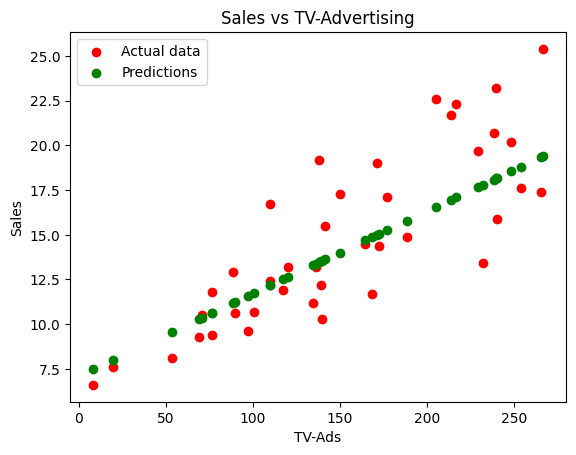

In [17]:
plt.scatter(X_test, y_test, label='Actual data', color = 'red')
plt.scatter(X_test, y_preds, label='Predictions', color = 'green')
plt.legend()
plt.xlabel('TV-Ads')
plt.ylabel('Sales')
plt.title('Sales vs TV-Advertising')
plt.show()

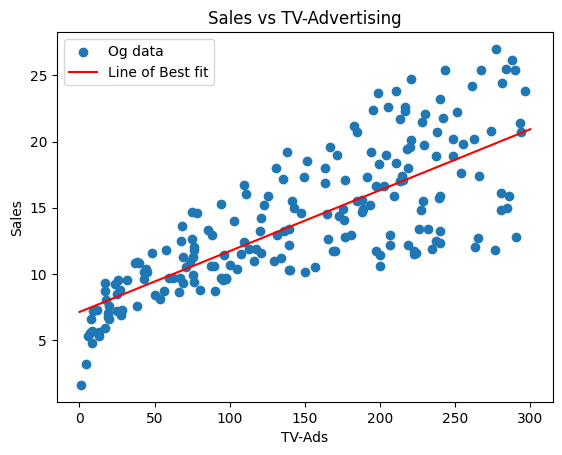

In [18]:
slope = model.coef_[0]
intercept = model.intercept_
x_line = np.linspace(0,300,3000)

y_line = slope*x_line +  intercept

plt.scatter(X,y, label='Og data')
plt.plot(x_line,y_line, color = 'red', label='Line of Best fit')
plt.legend()
plt.xlabel('TV-Ads')
plt.ylabel('Sales')
plt.title('Sales vs TV-Advertising')
plt.show()

In [19]:
import joblib

joblib.dump(model, 'my_first_model.pkl')

loaded_model = joblib.load('my_first_model.pkl')

why linear regression?

linear regression is a statistical method used to predict a dependent variable (like sales) based on one or more independent variables (like TV advertising spend)

the goal is to find a straight line that best represents the relationship between the variables

slope indicates how much sales change with each unit increase in TV ads.

the expected sales when TV ads are zero

to measure how well our model fits the data we use a loss function which calculates the difference between predicted and actual values common metrics include:
Mean Absolute Error (MAE): Average absolute differences
Mean Squared Error (MSE): Average squared differences which penalizes larger errors more
we use gradient descent to adjust the slope and intercept iteratively minimizing the loss function until we find the best-fit line
we split our data into training and testing sets the model learns from the training set and we evaluate its performance on the testing set to ensure it generalizes well
we can visualize the model's predictions against actual values using scatter plots to assess its accuracy and identify any outliers